In [1]:
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils

sys.path.insert(0, "..")
import src.models.mapAutoencoder200 as mapAutoencoder


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
log_dir = "/home/asad/catkin_ws2/src/turtlebot3_activeSLAM/dqn_controller/log/"

maps = np.concatenate([np.load(log_dir + f + "/maps.npy") for f in os.listdir(log_dir) if f.find("2023") == 0], axis=0)

maps = torch.stack([mapAutoencoder.transform_map(m) for m in maps]).to(device)

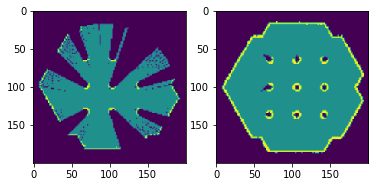

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(maps[0].cpu().numpy().squeeze())

plt.subplot(1, 2, 2)
plt.imshow(maps[-1].cpu().numpy().squeeze())

plt.show()

In [5]:
train_data, test_data = train_test_split(maps, test_size=0.2, shuffle=True)
train_dataset = data_utils.TensorDataset(train_data)
test_dataset = data_utils.TensorDataset(test_data)

train_data_loader = data_utils.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_data_loader = data_utils.DataLoader(test_dataset, batch_size=128, shuffle=True)

print(train_data.shape)
print(test_data.shape)

torch.Size([9479, 1, 200, 200])
torch.Size([2370, 1, 200, 200])


In [6]:
autoencoder = mapAutoencoder.Autoencoder().to(device)

cirterion = nn.L1Loss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

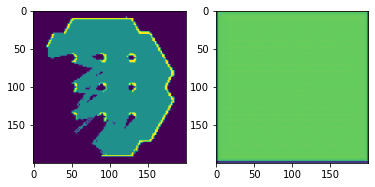

In [7]:
def plot_result(model, test_data, index = -1):
    if index == -1:
      index = np.random.randint(len(test_data))

    plt.subplot(1, 2, 1)
    plt.imshow(test_data[index].cpu().squeeze())

    with torch.no_grad():
        result = model(test_data[index])
    plt.subplot(1, 2, 2)
    plt.imshow(result[0].cpu().squeeze())
    plt.show()

plot_result(autoencoder, test_data)

Epoch [1/50], Step [5/75], Loss: 0.257383
Epoch [1/50], Step [10/75], Loss: 0.255664
Epoch [1/50], Step [15/75], Loss: 0.255291
Epoch [1/50], Step [20/75], Loss: 0.254062
Epoch [1/50], Step [25/75], Loss: 0.246313
Epoch [1/50], Step [30/75], Loss: 0.248377
Epoch [1/50], Step [35/75], Loss: 0.238761
Epoch [1/50], Step [40/75], Loss: 0.235330
Epoch [1/50], Step [45/75], Loss: 0.239999
Epoch [1/50], Step [50/75], Loss: 0.237113
Epoch [1/50], Step [55/75], Loss: 0.227637
Epoch [1/50], Step [60/75], Loss: 0.234596
Epoch [1/50], Step [65/75], Loss: 0.233812
Epoch [1/50], Step [70/75], Loss: 0.228828
Epoch [1/50], Step [75/75], Loss: 0.247218
Epoch [1/50], Average Train Loss: 0.243908, Average Test Loss: 0.232184


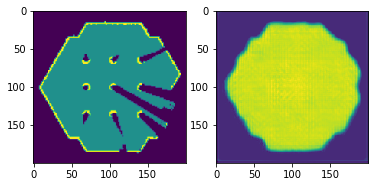

Epoch [2/50], Step [5/75], Loss: 0.231307
Epoch [2/50], Step [10/75], Loss: 0.226699
Epoch [2/50], Step [15/75], Loss: 0.228751
Epoch [2/50], Step [20/75], Loss: 0.232655
Epoch [2/50], Step [25/75], Loss: 0.229965
Epoch [2/50], Step [30/75], Loss: 0.237894
Epoch [2/50], Step [35/75], Loss: 0.233659
Epoch [2/50], Step [40/75], Loss: 0.229233
Epoch [2/50], Step [45/75], Loss: 0.233957
Epoch [2/50], Step [50/75], Loss: 0.232208
Epoch [2/50], Step [55/75], Loss: 0.227245
Epoch [2/50], Step [60/75], Loss: 0.223752
Epoch [2/50], Step [65/75], Loss: 0.223664
Epoch [2/50], Step [70/75], Loss: 0.223817
Epoch [2/50], Step [75/75], Loss: 0.247714
Epoch [2/50], Average Train Loss: 0.229076, Average Test Loss: 0.225048


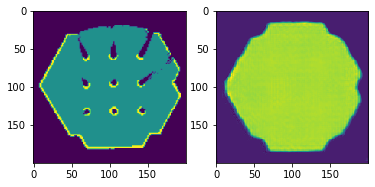

Epoch [3/50], Step [5/75], Loss: 0.228629
Epoch [3/50], Step [10/75], Loss: 0.221864
Epoch [3/50], Step [15/75], Loss: 0.220047
Epoch [3/50], Step [20/75], Loss: 0.223907
Epoch [3/50], Step [25/75], Loss: 0.222427
Epoch [3/50], Step [30/75], Loss: 0.222429
Epoch [3/50], Step [35/75], Loss: 0.222495
Epoch [3/50], Step [40/75], Loss: 0.224712
Epoch [3/50], Step [45/75], Loss: 0.219256
Epoch [3/50], Step [50/75], Loss: 0.222620
Epoch [3/50], Step [55/75], Loss: 0.219462
Epoch [3/50], Step [60/75], Loss: 0.201575
Epoch [3/50], Step [65/75], Loss: 0.120630
Epoch [3/50], Step [70/75], Loss: 0.111177
Epoch [3/50], Step [75/75], Loss: 0.091343
Epoch [3/50], Average Train Loss: 0.202091, Average Test Loss: 0.094279


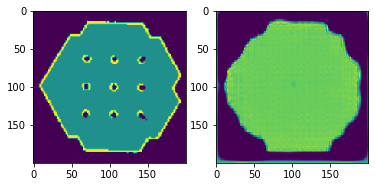

Epoch [4/50], Step [5/75], Loss: 0.086974
Epoch [4/50], Step [10/75], Loss: 0.079984
Epoch [4/50], Step [15/75], Loss: 0.078916
Epoch [4/50], Step [20/75], Loss: 0.075550
Epoch [4/50], Step [25/75], Loss: 0.073886
Epoch [4/50], Step [30/75], Loss: 0.065535
Epoch [4/50], Step [35/75], Loss: 0.063805
Epoch [4/50], Step [40/75], Loss: 0.058989
Epoch [4/50], Step [45/75], Loss: 0.062993
Epoch [4/50], Step [50/75], Loss: 0.057665
Epoch [4/50], Step [55/75], Loss: 0.060703
Epoch [4/50], Step [60/75], Loss: 0.056688
Epoch [4/50], Step [65/75], Loss: 0.054485
Epoch [4/50], Step [70/75], Loss: 0.054186
Epoch [4/50], Step [75/75], Loss: 0.064514
Epoch [4/50], Average Train Loss: 0.067044, Average Test Loss: 0.057466


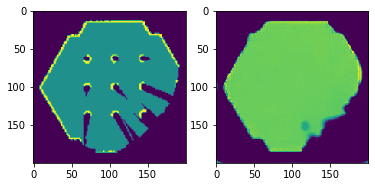

Epoch [5/50], Step [5/75], Loss: 0.057535
Epoch [5/50], Step [10/75], Loss: 0.053326
Epoch [5/50], Step [15/75], Loss: 0.055721
Epoch [5/50], Step [20/75], Loss: 0.053651
Epoch [5/50], Step [25/75], Loss: 0.051999
Epoch [5/50], Step [30/75], Loss: 0.052912
Epoch [5/50], Step [35/75], Loss: 0.052655
Epoch [5/50], Step [40/75], Loss: 0.053914
Epoch [5/50], Step [45/75], Loss: 0.052422
Epoch [5/50], Step [50/75], Loss: 0.053257
Epoch [5/50], Step [55/75], Loss: 0.052731
Epoch [5/50], Step [60/75], Loss: 0.055904
Epoch [5/50], Step [65/75], Loss: 0.054510
Epoch [5/50], Step [70/75], Loss: 0.050577
Epoch [5/50], Step [75/75], Loss: 0.059788
Epoch [5/50], Average Train Loss: 0.053716, Average Test Loss: 0.051727


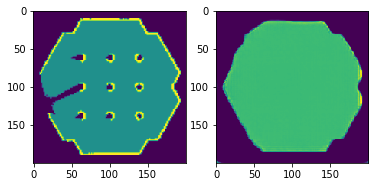

Epoch [6/50], Step [5/75], Loss: 0.049719
Epoch [6/50], Step [10/75], Loss: 0.050919
Epoch [6/50], Step [15/75], Loss: 0.050445
Epoch [6/50], Step [20/75], Loss: 0.049777
Epoch [6/50], Step [25/75], Loss: 0.049872
Epoch [6/50], Step [30/75], Loss: 0.048783
Epoch [6/50], Step [35/75], Loss: 0.050039
Epoch [6/50], Step [40/75], Loss: 0.050292
Epoch [6/50], Step [45/75], Loss: 0.048181
Epoch [6/50], Step [50/75], Loss: 0.050843
Epoch [6/50], Step [55/75], Loss: 0.049824
Epoch [6/50], Step [60/75], Loss: 0.050888
Epoch [6/50], Step [65/75], Loss: 0.048896
Epoch [6/50], Step [70/75], Loss: 0.049315
Epoch [6/50], Step [75/75], Loss: 0.045115
Epoch [6/50], Average Train Loss: 0.050085, Average Test Loss: 0.048740


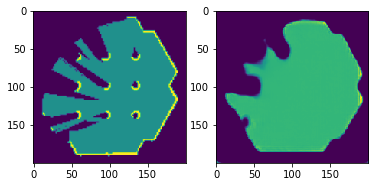

Epoch [7/50], Step [5/75], Loss: 0.046786
Epoch [7/50], Step [10/75], Loss: 0.047287
Epoch [7/50], Step [15/75], Loss: 0.046259
Epoch [7/50], Step [20/75], Loss: 0.048909
Epoch [7/50], Step [25/75], Loss: 0.043583
Epoch [7/50], Step [30/75], Loss: 0.047071
Epoch [7/50], Step [35/75], Loss: 0.048225
Epoch [7/50], Step [40/75], Loss: 0.048079
Epoch [7/50], Step [45/75], Loss: 0.047193
Epoch [7/50], Step [50/75], Loss: 0.046007
Epoch [7/50], Step [55/75], Loss: 0.047377
Epoch [7/50], Step [60/75], Loss: 0.046390
Epoch [7/50], Step [65/75], Loss: 0.045254
Epoch [7/50], Step [70/75], Loss: 0.044197
Epoch [7/50], Step [75/75], Loss: 0.054043
Epoch [7/50], Average Train Loss: 0.047229, Average Test Loss: 0.046416


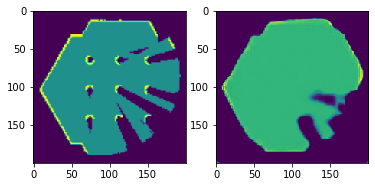

Epoch [8/50], Step [5/75], Loss: 0.047740
Epoch [8/50], Step [10/75], Loss: 0.045863
Epoch [8/50], Step [15/75], Loss: 0.044712
Epoch [8/50], Step [20/75], Loss: 0.047016
Epoch [8/50], Step [25/75], Loss: 0.045753
Epoch [8/50], Step [30/75], Loss: 0.047131
Epoch [8/50], Step [35/75], Loss: 0.044940
Epoch [8/50], Step [40/75], Loss: 0.045668
Epoch [8/50], Step [45/75], Loss: 0.045649
Epoch [8/50], Step [50/75], Loss: 0.044569
Epoch [8/50], Step [55/75], Loss: 0.043656
Epoch [8/50], Step [60/75], Loss: 0.043748
Epoch [8/50], Step [65/75], Loss: 0.043910
Epoch [8/50], Step [70/75], Loss: 0.044349
Epoch [8/50], Step [75/75], Loss: 0.045594
Epoch [8/50], Average Train Loss: 0.045340, Average Test Loss: 0.049589


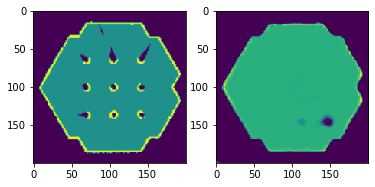

Epoch [9/50], Step [5/75], Loss: 0.047712
Epoch [9/50], Step [10/75], Loss: 0.044712
Epoch [9/50], Step [15/75], Loss: 0.045913
Epoch [9/50], Step [20/75], Loss: 0.045083
Epoch [9/50], Step [25/75], Loss: 0.043070
Epoch [9/50], Step [30/75], Loss: 0.043265
Epoch [9/50], Step [35/75], Loss: 0.043405
Epoch [9/50], Step [40/75], Loss: 0.044632
Epoch [9/50], Step [45/75], Loss: 0.043322
Epoch [9/50], Step [50/75], Loss: 0.044441
Epoch [9/50], Step [55/75], Loss: 0.043945
Epoch [9/50], Step [60/75], Loss: 0.041644
Epoch [9/50], Step [65/75], Loss: 0.043775
Epoch [9/50], Step [70/75], Loss: 0.042034
Epoch [9/50], Step [75/75], Loss: 0.038992
Epoch [9/50], Average Train Loss: 0.043828, Average Test Loss: 0.042828


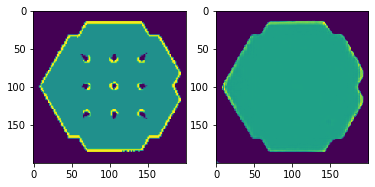

Epoch [10/50], Step [5/75], Loss: 0.043499
Epoch [10/50], Step [10/75], Loss: 0.041603
Epoch [10/50], Step [15/75], Loss: 0.040924
Epoch [10/50], Step [20/75], Loss: 0.041041
Epoch [10/50], Step [25/75], Loss: 0.040801
Epoch [10/50], Step [30/75], Loss: 0.042444
Epoch [10/50], Step [35/75], Loss: 0.042429
Epoch [10/50], Step [40/75], Loss: 0.043192
Epoch [10/50], Step [45/75], Loss: 0.041802
Epoch [10/50], Step [50/75], Loss: 0.042406
Epoch [10/50], Step [55/75], Loss: 0.041388
Epoch [10/50], Step [60/75], Loss: 0.041091
Epoch [10/50], Step [65/75], Loss: 0.042567
Epoch [10/50], Step [70/75], Loss: 0.041572
Epoch [10/50], Step [75/75], Loss: 0.040653
Epoch [10/50], Average Train Loss: 0.041960, Average Test Loss: 0.041469


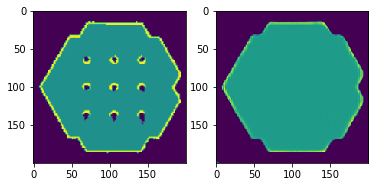

Epoch [11/50], Step [5/75], Loss: 0.041638
Epoch [11/50], Step [10/75], Loss: 0.040827
Epoch [11/50], Step [15/75], Loss: 0.039956
Epoch [11/50], Step [20/75], Loss: 0.041618
Epoch [11/50], Step [25/75], Loss: 0.042330
Epoch [11/50], Step [30/75], Loss: 0.040581
Epoch [11/50], Step [35/75], Loss: 0.041540
Epoch [11/50], Step [40/75], Loss: 0.038652
Epoch [11/50], Step [45/75], Loss: 0.041020
Epoch [11/50], Step [50/75], Loss: 0.040318
Epoch [11/50], Step [55/75], Loss: 0.039245
Epoch [11/50], Step [60/75], Loss: 0.039838
Epoch [11/50], Step [65/75], Loss: 0.039515
Epoch [11/50], Step [70/75], Loss: 0.040611
Epoch [11/50], Step [75/75], Loss: 0.035478
Epoch [11/50], Average Train Loss: 0.040605, Average Test Loss: 0.040354


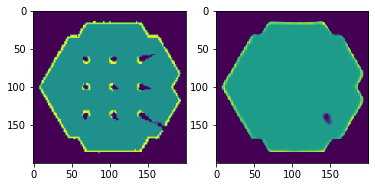

Epoch [12/50], Step [5/75], Loss: 0.040163
Epoch [12/50], Step [10/75], Loss: 0.041059
Epoch [12/50], Step [15/75], Loss: 0.040683
Epoch [12/50], Step [20/75], Loss: 0.039832
Epoch [12/50], Step [25/75], Loss: 0.038392
Epoch [12/50], Step [30/75], Loss: 0.039036
Epoch [12/50], Step [35/75], Loss: 0.040146
Epoch [12/50], Step [40/75], Loss: 0.040693
Epoch [12/50], Step [45/75], Loss: 0.039485
Epoch [12/50], Step [50/75], Loss: 0.040898
Epoch [12/50], Step [55/75], Loss: 0.040532
Epoch [12/50], Step [60/75], Loss: 0.038886
Epoch [12/50], Step [65/75], Loss: 0.038878
Epoch [12/50], Step [70/75], Loss: 0.039564
Epoch [12/50], Step [75/75], Loss: 0.044665
Epoch [12/50], Average Train Loss: 0.039530, Average Test Loss: 0.040130


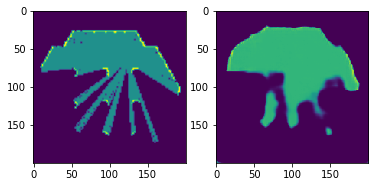

Epoch [13/50], Step [5/75], Loss: 0.040678
Epoch [13/50], Step [10/75], Loss: 0.038299
Epoch [13/50], Step [15/75], Loss: 0.037736
Epoch [13/50], Step [20/75], Loss: 0.038098
Epoch [13/50], Step [25/75], Loss: 0.037717
Epoch [13/50], Step [30/75], Loss: 0.038017
Epoch [13/50], Step [35/75], Loss: 0.037811
Epoch [13/50], Step [40/75], Loss: 0.037579
Epoch [13/50], Step [45/75], Loss: 0.038217
Epoch [13/50], Step [50/75], Loss: 0.037746
Epoch [13/50], Step [55/75], Loss: 0.037857
Epoch [13/50], Step [60/75], Loss: 0.039847
Epoch [13/50], Step [65/75], Loss: 0.037307
Epoch [13/50], Step [70/75], Loss: 0.038530
Epoch [13/50], Step [75/75], Loss: 0.047419
Epoch [13/50], Average Train Loss: 0.038587, Average Test Loss: 0.039124


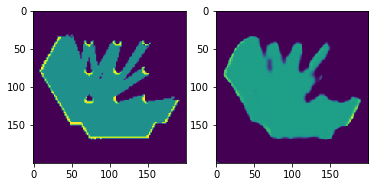

Epoch [14/50], Step [5/75], Loss: 0.038153
Epoch [14/50], Step [10/75], Loss: 0.036817
Epoch [14/50], Step [15/75], Loss: 0.037870
Epoch [14/50], Step [20/75], Loss: 0.037480
Epoch [14/50], Step [25/75], Loss: 0.036736
Epoch [14/50], Step [30/75], Loss: 0.039833
Epoch [14/50], Step [35/75], Loss: 0.036804
Epoch [14/50], Step [40/75], Loss: 0.037292
Epoch [14/50], Step [45/75], Loss: 0.038345
Epoch [14/50], Step [50/75], Loss: 0.037448
Epoch [14/50], Step [55/75], Loss: 0.036151
Epoch [14/50], Step [60/75], Loss: 0.036922
Epoch [14/50], Step [65/75], Loss: 0.037526
Epoch [14/50], Step [70/75], Loss: 0.036828
Epoch [14/50], Step [75/75], Loss: 0.039004
Epoch [14/50], Average Train Loss: 0.037477, Average Test Loss: 0.037152


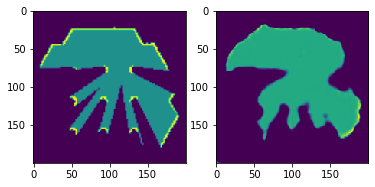

Epoch [15/50], Step [5/75], Loss: 0.037828
Epoch [15/50], Step [10/75], Loss: 0.036843
Epoch [15/50], Step [15/75], Loss: 0.037033
Epoch [15/50], Step [20/75], Loss: 0.035687
Epoch [15/50], Step [25/75], Loss: 0.036123
Epoch [15/50], Step [30/75], Loss: 0.038234
Epoch [15/50], Step [35/75], Loss: 0.037082
Epoch [15/50], Step [40/75], Loss: 0.036173
Epoch [15/50], Step [45/75], Loss: 0.035076
Epoch [15/50], Step [50/75], Loss: 0.035928
Epoch [15/50], Step [55/75], Loss: 0.036520
Epoch [15/50], Step [60/75], Loss: 0.035687
Epoch [15/50], Step [65/75], Loss: 0.036492
Epoch [15/50], Step [70/75], Loss: 0.035033
Epoch [15/50], Step [75/75], Loss: 0.038273
Epoch [15/50], Average Train Loss: 0.036431, Average Test Loss: 0.036309


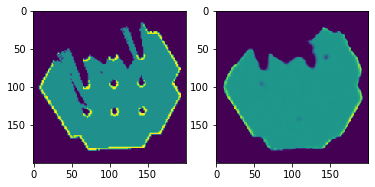

Epoch [16/50], Step [5/75], Loss: 0.036256
Epoch [16/50], Step [10/75], Loss: 0.037045
Epoch [16/50], Step [15/75], Loss: 0.037614
Epoch [16/50], Step [20/75], Loss: 0.038877
Epoch [16/50], Step [25/75], Loss: 0.035483
Epoch [16/50], Step [30/75], Loss: 0.036389
Epoch [16/50], Step [35/75], Loss: 0.036101
Epoch [16/50], Step [40/75], Loss: 0.036560
Epoch [16/50], Step [45/75], Loss: 0.036302
Epoch [16/50], Step [50/75], Loss: 0.036265
Epoch [16/50], Step [55/75], Loss: 0.035169
Epoch [16/50], Step [60/75], Loss: 0.034981
Epoch [16/50], Step [65/75], Loss: 0.035739
Epoch [16/50], Step [70/75], Loss: 0.036261
Epoch [16/50], Step [75/75], Loss: 0.031163
Epoch [16/50], Average Train Loss: 0.035505, Average Test Loss: 0.036282


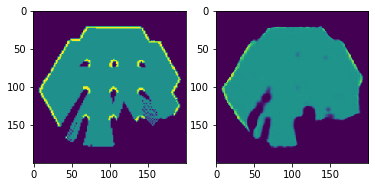

Epoch [17/50], Step [5/75], Loss: 0.034355
Epoch [17/50], Step [10/75], Loss: 0.033557
Epoch [17/50], Step [15/75], Loss: 0.035202
Epoch [17/50], Step [20/75], Loss: 0.033666
Epoch [17/50], Step [25/75], Loss: 0.032918
Epoch [17/50], Step [30/75], Loss: 0.035812
Epoch [17/50], Step [35/75], Loss: 0.036865
Epoch [17/50], Step [40/75], Loss: 0.036160
Epoch [17/50], Step [45/75], Loss: 0.036805
Epoch [17/50], Step [50/75], Loss: 0.036214
Epoch [17/50], Step [55/75], Loss: 0.033624
Epoch [17/50], Step [60/75], Loss: 0.034063
Epoch [17/50], Step [65/75], Loss: 0.035720
Epoch [17/50], Step [70/75], Loss: 0.033116
Epoch [17/50], Step [75/75], Loss: 0.035234
Epoch [17/50], Average Train Loss: 0.034918, Average Test Loss: 0.034893


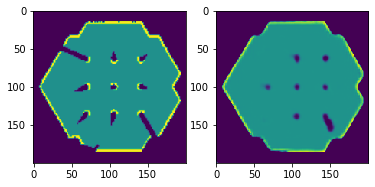

Epoch [18/50], Step [5/75], Loss: 0.035293
Epoch [18/50], Step [10/75], Loss: 0.034383
Epoch [18/50], Step [15/75], Loss: 0.034122
Epoch [18/50], Step [20/75], Loss: 0.033818
Epoch [18/50], Step [25/75], Loss: 0.032832
Epoch [18/50], Step [30/75], Loss: 0.034641
Epoch [18/50], Step [35/75], Loss: 0.034399
Epoch [18/50], Step [40/75], Loss: 0.034882
Epoch [18/50], Step [45/75], Loss: 0.037288
Epoch [18/50], Step [50/75], Loss: 0.033924
Epoch [18/50], Step [55/75], Loss: 0.033124
Epoch [18/50], Step [60/75], Loss: 0.033258
Epoch [18/50], Step [65/75], Loss: 0.033650
Epoch [18/50], Step [70/75], Loss: 0.032713
Epoch [18/50], Step [75/75], Loss: 0.029528
Epoch [18/50], Average Train Loss: 0.033977, Average Test Loss: 0.034267


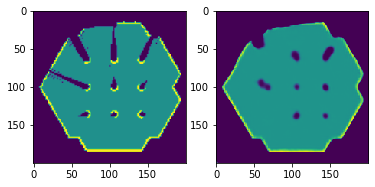

Epoch [19/50], Step [5/75], Loss: 0.032909
Epoch [19/50], Step [10/75], Loss: 0.033649
Epoch [19/50], Step [15/75], Loss: 0.033613
Epoch [19/50], Step [20/75], Loss: 0.032460
Epoch [19/50], Step [25/75], Loss: 0.033533
Epoch [19/50], Step [30/75], Loss: 0.031847
Epoch [19/50], Step [35/75], Loss: 0.034493
Epoch [19/50], Step [40/75], Loss: 0.033156
Epoch [19/50], Step [45/75], Loss: 0.031875
Epoch [19/50], Step [50/75], Loss: 0.032088
Epoch [19/50], Step [55/75], Loss: 0.032586
Epoch [19/50], Step [60/75], Loss: 0.031171
Epoch [19/50], Step [65/75], Loss: 0.032855
Epoch [19/50], Step [70/75], Loss: 0.032174
Epoch [19/50], Step [75/75], Loss: 0.036281
Epoch [19/50], Average Train Loss: 0.032623, Average Test Loss: 0.032447


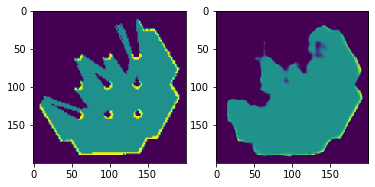

Epoch [20/50], Step [5/75], Loss: 0.033483
Epoch [20/50], Step [10/75], Loss: 0.031187
Epoch [20/50], Step [15/75], Loss: 0.031231
Epoch [20/50], Step [20/75], Loss: 0.031843
Epoch [20/50], Step [25/75], Loss: 0.031371
Epoch [20/50], Step [30/75], Loss: 0.032088
Epoch [20/50], Step [35/75], Loss: 0.031074
Epoch [20/50], Step [40/75], Loss: 0.031472
Epoch [20/50], Step [45/75], Loss: 0.030632
Epoch [20/50], Step [50/75], Loss: 0.029794
Epoch [20/50], Step [55/75], Loss: 0.031117
Epoch [20/50], Step [60/75], Loss: 0.031690
Epoch [20/50], Step [65/75], Loss: 0.031561
Epoch [20/50], Step [70/75], Loss: 0.031106
Epoch [20/50], Step [75/75], Loss: 0.032234
Epoch [20/50], Average Train Loss: 0.031701, Average Test Loss: 0.031543


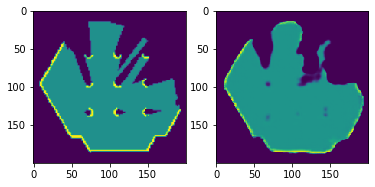

Epoch [21/50], Step [5/75], Loss: 0.033480
Epoch [21/50], Step [10/75], Loss: 0.031804
Epoch [21/50], Step [15/75], Loss: 0.032386
Epoch [21/50], Step [20/75], Loss: 0.031213
Epoch [21/50], Step [25/75], Loss: 0.030775
Epoch [21/50], Step [30/75], Loss: 0.031759
Epoch [21/50], Step [35/75], Loss: 0.029351
Epoch [21/50], Step [40/75], Loss: 0.030121
Epoch [21/50], Step [45/75], Loss: 0.030887
Epoch [21/50], Step [50/75], Loss: 0.030879
Epoch [21/50], Step [55/75], Loss: 0.030325
Epoch [21/50], Step [60/75], Loss: 0.029279
Epoch [21/50], Step [65/75], Loss: 0.031480
Epoch [21/50], Step [70/75], Loss: 0.030534
Epoch [21/50], Step [75/75], Loss: 0.029064
Epoch [21/50], Average Train Loss: 0.030807, Average Test Loss: 0.030815


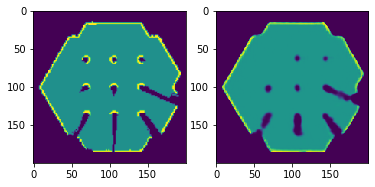

Epoch [22/50], Step [5/75], Loss: 0.031102
Epoch [22/50], Step [10/75], Loss: 0.030066
Epoch [22/50], Step [15/75], Loss: 0.029501
Epoch [22/50], Step [20/75], Loss: 0.029541
Epoch [22/50], Step [25/75], Loss: 0.030808
Epoch [22/50], Step [30/75], Loss: 0.031442
Epoch [22/50], Step [35/75], Loss: 0.031563
Epoch [22/50], Step [40/75], Loss: 0.030185
Epoch [22/50], Step [45/75], Loss: 0.029349
Epoch [22/50], Step [50/75], Loss: 0.031358
Epoch [22/50], Step [55/75], Loss: 0.029717
Epoch [22/50], Step [60/75], Loss: 0.030536
Epoch [22/50], Step [65/75], Loss: 0.030037
Epoch [22/50], Step [70/75], Loss: 0.031942
Epoch [22/50], Step [75/75], Loss: 0.035427
Epoch [22/50], Average Train Loss: 0.030337, Average Test Loss: 0.032002


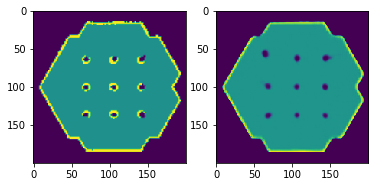

Epoch [23/50], Step [5/75], Loss: 0.032653
Epoch [23/50], Step [10/75], Loss: 0.030398
Epoch [23/50], Step [15/75], Loss: 0.030078
Epoch [23/50], Step [20/75], Loss: 0.029675
Epoch [23/50], Step [25/75], Loss: 0.029953
Epoch [23/50], Step [30/75], Loss: 0.030835
Epoch [23/50], Step [35/75], Loss: 0.028618
Epoch [23/50], Step [40/75], Loss: 0.029216
Epoch [23/50], Step [45/75], Loss: 0.028963
Epoch [23/50], Step [50/75], Loss: 0.030326
Epoch [23/50], Step [55/75], Loss: 0.028984
Epoch [23/50], Step [60/75], Loss: 0.029519
Epoch [23/50], Step [65/75], Loss: 0.028370
Epoch [23/50], Step [70/75], Loss: 0.028097
Epoch [23/50], Step [75/75], Loss: 0.029212
Epoch [23/50], Average Train Loss: 0.029836, Average Test Loss: 0.030770


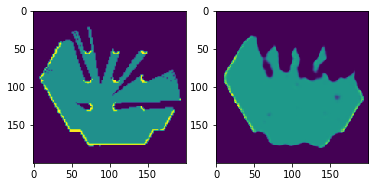

Epoch [24/50], Step [5/75], Loss: 0.030639
Epoch [24/50], Step [10/75], Loss: 0.031171
Epoch [24/50], Step [15/75], Loss: 0.030481
Epoch [24/50], Step [20/75], Loss: 0.029679
Epoch [24/50], Step [25/75], Loss: 0.029515
Epoch [24/50], Step [30/75], Loss: 0.030522
Epoch [24/50], Step [35/75], Loss: 0.028901
Epoch [24/50], Step [40/75], Loss: 0.028209
Epoch [24/50], Step [45/75], Loss: 0.028951
Epoch [24/50], Step [50/75], Loss: 0.029178
Epoch [24/50], Step [55/75], Loss: 0.028509
Epoch [24/50], Step [60/75], Loss: 0.027968
Epoch [24/50], Step [65/75], Loss: 0.028200
Epoch [24/50], Step [70/75], Loss: 0.029469
Epoch [24/50], Step [75/75], Loss: 0.028290
Epoch [24/50], Average Train Loss: 0.029125, Average Test Loss: 0.029399


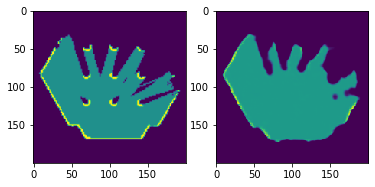

Epoch [25/50], Step [5/75], Loss: 0.030001
Epoch [25/50], Step [10/75], Loss: 0.028817
Epoch [25/50], Step [15/75], Loss: 0.029346
Epoch [25/50], Step [20/75], Loss: 0.028872
Epoch [25/50], Step [25/75], Loss: 0.028727
Epoch [25/50], Step [30/75], Loss: 0.028167
Epoch [25/50], Step [35/75], Loss: 0.028974
Epoch [25/50], Step [40/75], Loss: 0.028915
Epoch [25/50], Step [45/75], Loss: 0.028309
Epoch [25/50], Step [50/75], Loss: 0.027716
Epoch [25/50], Step [55/75], Loss: 0.028522
Epoch [25/50], Step [60/75], Loss: 0.027759
Epoch [25/50], Step [65/75], Loss: 0.028672
Epoch [25/50], Step [70/75], Loss: 0.028175
Epoch [25/50], Step [75/75], Loss: 0.029506
Epoch [25/50], Average Train Loss: 0.028519, Average Test Loss: 0.030138


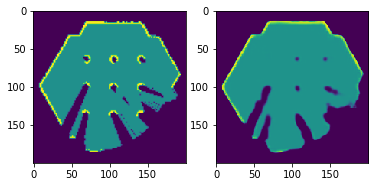

Epoch [26/50], Step [5/75], Loss: 0.028643
Epoch [26/50], Step [10/75], Loss: 0.028684
Epoch [26/50], Step [15/75], Loss: 0.028757
Epoch [26/50], Step [20/75], Loss: 0.027249
Epoch [26/50], Step [25/75], Loss: 0.028833
Epoch [26/50], Step [30/75], Loss: 0.027543
Epoch [26/50], Step [35/75], Loss: 0.028176
Epoch [26/50], Step [40/75], Loss: 0.028366
Epoch [26/50], Step [45/75], Loss: 0.027764
Epoch [26/50], Step [50/75], Loss: 0.027763
Epoch [26/50], Step [55/75], Loss: 0.029058
Epoch [26/50], Step [60/75], Loss: 0.028173
Epoch [26/50], Step [65/75], Loss: 0.027556
Epoch [26/50], Step [70/75], Loss: 0.027700
Epoch [26/50], Step [75/75], Loss: 0.025347
Epoch [26/50], Average Train Loss: 0.028202, Average Test Loss: 0.028193


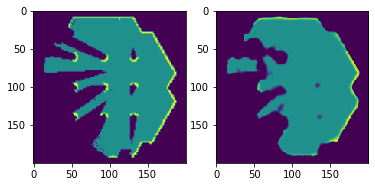

Epoch [27/50], Step [5/75], Loss: 0.029227
Epoch [27/50], Step [10/75], Loss: 0.026838
Epoch [27/50], Step [15/75], Loss: 0.028221
Epoch [27/50], Step [20/75], Loss: 0.027721
Epoch [27/50], Step [25/75], Loss: 0.028384
Epoch [27/50], Step [30/75], Loss: 0.027004
Epoch [27/50], Step [35/75], Loss: 0.027135
Epoch [27/50], Step [40/75], Loss: 0.028404
Epoch [27/50], Step [45/75], Loss: 0.027541
Epoch [27/50], Step [50/75], Loss: 0.027545
Epoch [27/50], Step [55/75], Loss: 0.027446
Epoch [27/50], Step [60/75], Loss: 0.027206
Epoch [27/50], Step [65/75], Loss: 0.028503
Epoch [27/50], Step [70/75], Loss: 0.026758
Epoch [27/50], Step [75/75], Loss: 0.025140
Epoch [27/50], Average Train Loss: 0.027513, Average Test Loss: 0.028255


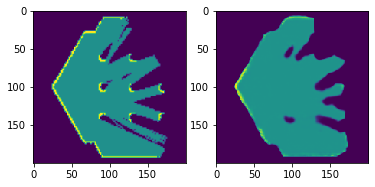

Epoch [28/50], Step [5/75], Loss: 0.027287
Epoch [28/50], Step [10/75], Loss: 0.027054
Epoch [28/50], Step [15/75], Loss: 0.027498
Epoch [28/50], Step [20/75], Loss: 0.026831
Epoch [28/50], Step [25/75], Loss: 0.027163
Epoch [28/50], Step [30/75], Loss: 0.026591
Epoch [28/50], Step [35/75], Loss: 0.027637
Epoch [28/50], Step [40/75], Loss: 0.027449
Epoch [28/50], Step [45/75], Loss: 0.027465
Epoch [28/50], Step [50/75], Loss: 0.026278
Epoch [28/50], Step [55/75], Loss: 0.026749
Epoch [28/50], Step [60/75], Loss: 0.026934
Epoch [28/50], Step [65/75], Loss: 0.026955
Epoch [28/50], Step [70/75], Loss: 0.025624
Epoch [28/50], Step [75/75], Loss: 0.029393
Epoch [28/50], Average Train Loss: 0.027166, Average Test Loss: 0.027381


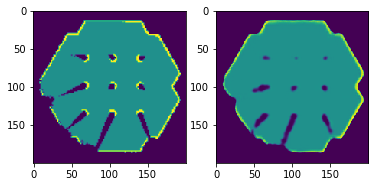

Epoch [29/50], Step [5/75], Loss: 0.026411
Epoch [29/50], Step [10/75], Loss: 0.026540
Epoch [29/50], Step [15/75], Loss: 0.027735
Epoch [29/50], Step [20/75], Loss: 0.027929
Epoch [29/50], Step [25/75], Loss: 0.026327
Epoch [29/50], Step [30/75], Loss: 0.027028
Epoch [29/50], Step [35/75], Loss: 0.027067
Epoch [29/50], Step [40/75], Loss: 0.026902
Epoch [29/50], Step [45/75], Loss: 0.026236
Epoch [29/50], Step [50/75], Loss: 0.028100
Epoch [29/50], Step [55/75], Loss: 0.027110
Epoch [29/50], Step [60/75], Loss: 0.027541
Epoch [29/50], Step [65/75], Loss: 0.026581
Epoch [29/50], Step [70/75], Loss: 0.026848
Epoch [29/50], Step [75/75], Loss: 0.024061
Epoch [29/50], Average Train Loss: 0.027115, Average Test Loss: 0.026876


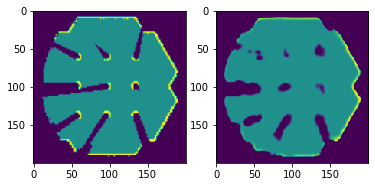

Epoch [30/50], Step [5/75], Loss: 0.027467
Epoch [30/50], Step [10/75], Loss: 0.027110
Epoch [30/50], Step [15/75], Loss: 0.025747
Epoch [30/50], Step [20/75], Loss: 0.026243
Epoch [30/50], Step [25/75], Loss: 0.026789
Epoch [30/50], Step [30/75], Loss: 0.025002
Epoch [30/50], Step [35/75], Loss: 0.027256
Epoch [30/50], Step [40/75], Loss: 0.025208
Epoch [30/50], Step [45/75], Loss: 0.026845
Epoch [30/50], Step [50/75], Loss: 0.026487
Epoch [30/50], Step [55/75], Loss: 0.026292
Epoch [30/50], Step [60/75], Loss: 0.027611
Epoch [30/50], Step [65/75], Loss: 0.025641
Epoch [30/50], Step [70/75], Loss: 0.027008
Epoch [30/50], Step [75/75], Loss: 0.028281
Epoch [30/50], Average Train Loss: 0.026481, Average Test Loss: 0.026814


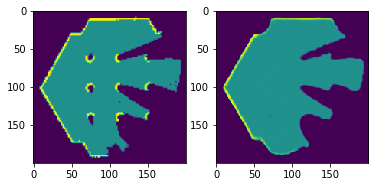

Epoch [31/50], Step [5/75], Loss: 0.027112
Epoch [31/50], Step [10/75], Loss: 0.026453
Epoch [31/50], Step [15/75], Loss: 0.027684
Epoch [31/50], Step [20/75], Loss: 0.027020
Epoch [31/50], Step [25/75], Loss: 0.026454
Epoch [31/50], Step [30/75], Loss: 0.026007
Epoch [31/50], Step [35/75], Loss: 0.025506
Epoch [31/50], Step [40/75], Loss: 0.025244
Epoch [31/50], Step [45/75], Loss: 0.024633
Epoch [31/50], Step [50/75], Loss: 0.026130
Epoch [31/50], Step [55/75], Loss: 0.024326
Epoch [31/50], Step [60/75], Loss: 0.025856
Epoch [31/50], Step [65/75], Loss: 0.025892
Epoch [31/50], Step [70/75], Loss: 0.025245
Epoch [31/50], Step [75/75], Loss: 0.022887
Epoch [31/50], Average Train Loss: 0.026036, Average Test Loss: 0.026260


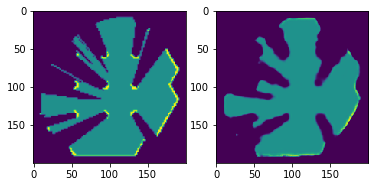

Epoch [32/50], Step [5/75], Loss: 0.025275
Epoch [32/50], Step [10/75], Loss: 0.025597
Epoch [32/50], Step [15/75], Loss: 0.026641
Epoch [32/50], Step [20/75], Loss: 0.026418
Epoch [32/50], Step [25/75], Loss: 0.025697
Epoch [32/50], Step [30/75], Loss: 0.025515
Epoch [32/50], Step [35/75], Loss: 0.024873
Epoch [32/50], Step [40/75], Loss: 0.024903
Epoch [32/50], Step [45/75], Loss: 0.025866
Epoch [32/50], Step [50/75], Loss: 0.026160
Epoch [32/50], Step [55/75], Loss: 0.026824
Epoch [32/50], Step [60/75], Loss: 0.026446
Epoch [32/50], Step [65/75], Loss: 0.025703
Epoch [32/50], Step [70/75], Loss: 0.024952
Epoch [32/50], Step [75/75], Loss: 0.022322
Epoch [32/50], Average Train Loss: 0.025624, Average Test Loss: 0.026283


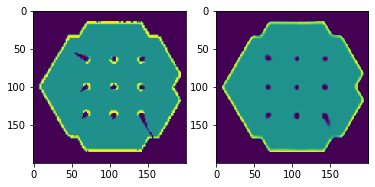

Epoch [33/50], Step [5/75], Loss: 0.025438
Epoch [33/50], Step [10/75], Loss: 0.024963
Epoch [33/50], Step [15/75], Loss: 0.026333
Epoch [33/50], Step [20/75], Loss: 0.025866
Epoch [33/50], Step [25/75], Loss: 0.026011
Epoch [33/50], Step [30/75], Loss: 0.025840
Epoch [33/50], Step [35/75], Loss: 0.025478
Epoch [33/50], Step [40/75], Loss: 0.026570
Epoch [33/50], Step [45/75], Loss: 0.025427
Epoch [33/50], Step [50/75], Loss: 0.025240
Epoch [33/50], Step [55/75], Loss: 0.025974
Epoch [33/50], Step [60/75], Loss: 0.024990
Epoch [33/50], Step [65/75], Loss: 0.024997
Epoch [33/50], Step [70/75], Loss: 0.026905
Epoch [33/50], Step [75/75], Loss: 0.025684
Epoch [33/50], Average Train Loss: 0.025611, Average Test Loss: 0.025774


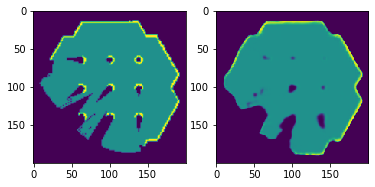

Epoch [34/50], Step [5/75], Loss: 0.026185
Epoch [34/50], Step [10/75], Loss: 0.026005
Epoch [34/50], Step [15/75], Loss: 0.025493
Epoch [34/50], Step [20/75], Loss: 0.025533
Epoch [34/50], Step [25/75], Loss: 0.025241
Epoch [34/50], Step [30/75], Loss: 0.025313
Epoch [34/50], Step [35/75], Loss: 0.024729
Epoch [34/50], Step [40/75], Loss: 0.026051
Epoch [34/50], Step [45/75], Loss: 0.024811
Epoch [34/50], Step [50/75], Loss: 0.025937
Epoch [34/50], Step [55/75], Loss: 0.024768
Epoch [34/50], Step [60/75], Loss: 0.025042
Epoch [34/50], Step [65/75], Loss: 0.024771
Epoch [34/50], Step [70/75], Loss: 0.024894
Epoch [34/50], Step [75/75], Loss: 0.022680
Epoch [34/50], Average Train Loss: 0.025238, Average Test Loss: 0.025345


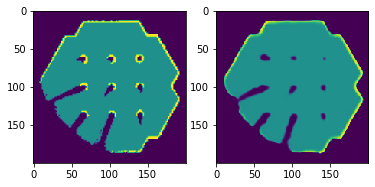

Epoch [35/50], Step [5/75], Loss: 0.025363
Epoch [35/50], Step [10/75], Loss: 0.024196
Epoch [35/50], Step [15/75], Loss: 0.025241
Epoch [35/50], Step [20/75], Loss: 0.026479
Epoch [35/50], Step [25/75], Loss: 0.025378
Epoch [35/50], Step [30/75], Loss: 0.024503
Epoch [35/50], Step [35/75], Loss: 0.025910
Epoch [35/50], Step [40/75], Loss: 0.025304
Epoch [35/50], Step [45/75], Loss: 0.024927
Epoch [35/50], Step [50/75], Loss: 0.024677
Epoch [35/50], Step [55/75], Loss: 0.025794
Epoch [35/50], Step [60/75], Loss: 0.026412
Epoch [35/50], Step [65/75], Loss: 0.024560
Epoch [35/50], Step [70/75], Loss: 0.025561
Epoch [35/50], Step [75/75], Loss: 0.023186
Epoch [35/50], Average Train Loss: 0.025047, Average Test Loss: 0.025064


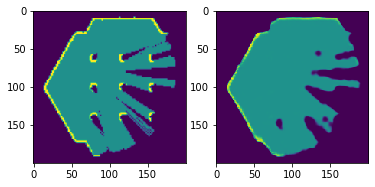

Epoch [36/50], Step [5/75], Loss: 0.024105
Epoch [36/50], Step [10/75], Loss: 0.025476
Epoch [36/50], Step [15/75], Loss: 0.025245
Epoch [36/50], Step [20/75], Loss: 0.025376
Epoch [36/50], Step [25/75], Loss: 0.025376
Epoch [36/50], Step [30/75], Loss: 0.025629
Epoch [36/50], Step [35/75], Loss: 0.026144
Epoch [36/50], Step [40/75], Loss: 0.025608
Epoch [36/50], Step [45/75], Loss: 0.023700
Epoch [36/50], Step [50/75], Loss: 0.024394
Epoch [36/50], Step [55/75], Loss: 0.024853
Epoch [36/50], Step [60/75], Loss: 0.025154
Epoch [36/50], Step [65/75], Loss: 0.025039
Epoch [36/50], Step [70/75], Loss: 0.023643
Epoch [36/50], Step [75/75], Loss: 0.021050
Epoch [36/50], Average Train Loss: 0.024848, Average Test Loss: 0.024779


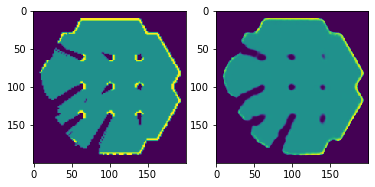

Epoch [37/50], Step [5/75], Loss: 0.024255
Epoch [37/50], Step [10/75], Loss: 0.024689
Epoch [37/50], Step [15/75], Loss: 0.024258
Epoch [37/50], Step [20/75], Loss: 0.024678
Epoch [37/50], Step [25/75], Loss: 0.023816
Epoch [37/50], Step [30/75], Loss: 0.024362
Epoch [37/50], Step [35/75], Loss: 0.025246
Epoch [37/50], Step [40/75], Loss: 0.024485
Epoch [37/50], Step [45/75], Loss: 0.023624
Epoch [37/50], Step [50/75], Loss: 0.024670
Epoch [37/50], Step [55/75], Loss: 0.025193
Epoch [37/50], Step [60/75], Loss: 0.025990
Epoch [37/50], Step [65/75], Loss: 0.024472
Epoch [37/50], Step [70/75], Loss: 0.023039
Epoch [37/50], Step [75/75], Loss: 0.023377
Epoch [37/50], Average Train Loss: 0.024548, Average Test Loss: 0.025131


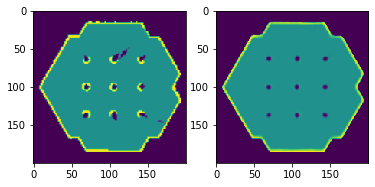

Epoch [38/50], Step [5/75], Loss: 0.024549
Epoch [38/50], Step [10/75], Loss: 0.024352
Epoch [38/50], Step [15/75], Loss: 0.025205
Epoch [38/50], Step [20/75], Loss: 0.024301
Epoch [38/50], Step [25/75], Loss: 0.023719
Epoch [38/50], Step [30/75], Loss: 0.024173
Epoch [38/50], Step [35/75], Loss: 0.023729
Epoch [38/50], Step [40/75], Loss: 0.025079
Epoch [38/50], Step [45/75], Loss: 0.024330
Epoch [38/50], Step [50/75], Loss: 0.022944
Epoch [38/50], Step [55/75], Loss: 0.024134
Epoch [38/50], Step [60/75], Loss: 0.024063
Epoch [38/50], Step [65/75], Loss: 0.024598
Epoch [38/50], Step [70/75], Loss: 0.024007
Epoch [38/50], Step [75/75], Loss: 0.021069
Epoch [38/50], Average Train Loss: 0.024374, Average Test Loss: 0.024934


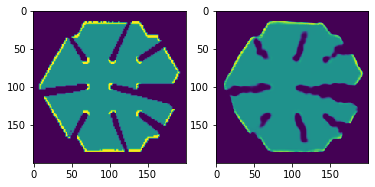

Epoch [39/50], Step [5/75], Loss: 0.023619
Epoch [39/50], Step [10/75], Loss: 0.024406
Epoch [39/50], Step [15/75], Loss: 0.023413
Epoch [39/50], Step [20/75], Loss: 0.024456
Epoch [39/50], Step [25/75], Loss: 0.025132
Epoch [39/50], Step [30/75], Loss: 0.024533
Epoch [39/50], Step [35/75], Loss: 0.025711
Epoch [39/50], Step [40/75], Loss: 0.024287
Epoch [39/50], Step [45/75], Loss: 0.023865
Epoch [39/50], Step [50/75], Loss: 0.024233
Epoch [39/50], Step [55/75], Loss: 0.024271
Epoch [39/50], Step [60/75], Loss: 0.023056
Epoch [39/50], Step [65/75], Loss: 0.024489
Epoch [39/50], Step [70/75], Loss: 0.023478
Epoch [39/50], Step [75/75], Loss: 0.027561
Epoch [39/50], Average Train Loss: 0.024180, Average Test Loss: 0.025081


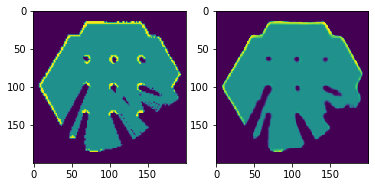

Epoch [40/50], Step [5/75], Loss: 0.023654
Epoch [40/50], Step [10/75], Loss: 0.024388
Epoch [40/50], Step [15/75], Loss: 0.023012
Epoch [40/50], Step [20/75], Loss: 0.024232
Epoch [40/50], Step [25/75], Loss: 0.025595
Epoch [40/50], Step [30/75], Loss: 0.024488
Epoch [40/50], Step [35/75], Loss: 0.024103
Epoch [40/50], Step [40/75], Loss: 0.024844
Epoch [40/50], Step [45/75], Loss: 0.022990
Epoch [40/50], Step [50/75], Loss: 0.024248
Epoch [40/50], Step [55/75], Loss: 0.023368
Epoch [40/50], Step [60/75], Loss: 0.022681
Epoch [40/50], Step [65/75], Loss: 0.024779
Epoch [40/50], Step [70/75], Loss: 0.023597
Epoch [40/50], Step [75/75], Loss: 0.023662
Epoch [40/50], Average Train Loss: 0.024109, Average Test Loss: 0.024706


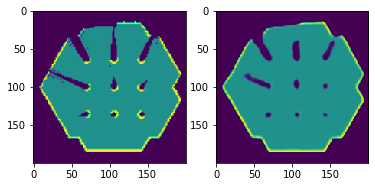

Epoch [41/50], Step [5/75], Loss: 0.023678
Epoch [41/50], Step [10/75], Loss: 0.024057
Epoch [41/50], Step [15/75], Loss: 0.024105
Epoch [41/50], Step [20/75], Loss: 0.023785
Epoch [41/50], Step [25/75], Loss: 0.023885
Epoch [41/50], Step [30/75], Loss: 0.023303
Epoch [41/50], Step [35/75], Loss: 0.025031
Epoch [41/50], Step [40/75], Loss: 0.024040
Epoch [41/50], Step [45/75], Loss: 0.023707
Epoch [41/50], Step [50/75], Loss: 0.024027
Epoch [41/50], Step [55/75], Loss: 0.023372
Epoch [41/50], Step [60/75], Loss: 0.023849
Epoch [41/50], Step [65/75], Loss: 0.023933
Epoch [41/50], Step [70/75], Loss: 0.024601
Epoch [41/50], Step [75/75], Loss: 0.022896
Epoch [41/50], Average Train Loss: 0.023823, Average Test Loss: 0.023869


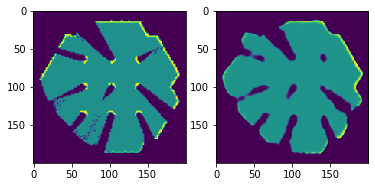

Epoch [42/50], Step [5/75], Loss: 0.023533
Epoch [42/50], Step [10/75], Loss: 0.023417
Epoch [42/50], Step [15/75], Loss: 0.023881
Epoch [42/50], Step [20/75], Loss: 0.023858
Epoch [42/50], Step [25/75], Loss: 0.023643
Epoch [42/50], Step [30/75], Loss: 0.023469
Epoch [42/50], Step [35/75], Loss: 0.023574
Epoch [42/50], Step [40/75], Loss: 0.023786
Epoch [42/50], Step [45/75], Loss: 0.022618
Epoch [42/50], Step [50/75], Loss: 0.023139
Epoch [42/50], Step [55/75], Loss: 0.022733
Epoch [42/50], Step [60/75], Loss: 0.023556
Epoch [42/50], Step [65/75], Loss: 0.023843
Epoch [42/50], Step [70/75], Loss: 0.023523
Epoch [42/50], Step [75/75], Loss: 0.026609
Epoch [42/50], Average Train Loss: 0.023702, Average Test Loss: 0.024229


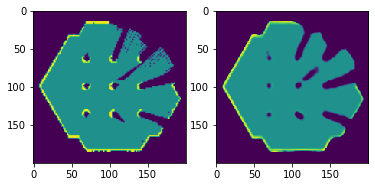

Epoch [43/50], Step [5/75], Loss: 0.024221
Epoch [43/50], Step [10/75], Loss: 0.023692
Epoch [43/50], Step [15/75], Loss: 0.023590
Epoch [43/50], Step [20/75], Loss: 0.023077
Epoch [43/50], Step [25/75], Loss: 0.024552
Epoch [43/50], Step [30/75], Loss: 0.023892
Epoch [43/50], Step [35/75], Loss: 0.023274
Epoch [43/50], Step [40/75], Loss: 0.024331
Epoch [43/50], Step [45/75], Loss: 0.024156
Epoch [43/50], Step [50/75], Loss: 0.022559
Epoch [43/50], Step [55/75], Loss: 0.023915
Epoch [43/50], Step [60/75], Loss: 0.023420
Epoch [43/50], Step [65/75], Loss: 0.023568
Epoch [43/50], Step [70/75], Loss: 0.024280
Epoch [43/50], Step [75/75], Loss: 0.020932
Epoch [43/50], Average Train Loss: 0.023527, Average Test Loss: 0.023808


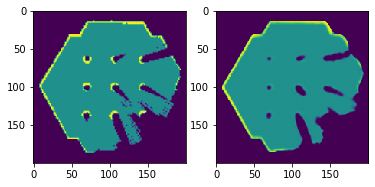

Epoch [44/50], Step [5/75], Loss: 0.024083
Epoch [44/50], Step [10/75], Loss: 0.023579
Epoch [44/50], Step [15/75], Loss: 0.024678
Epoch [44/50], Step [20/75], Loss: 0.024241
Epoch [44/50], Step [25/75], Loss: 0.023007
Epoch [44/50], Step [30/75], Loss: 0.022669
Epoch [44/50], Step [35/75], Loss: 0.024041
Epoch [44/50], Step [40/75], Loss: 0.023925
Epoch [44/50], Step [45/75], Loss: 0.024670
Epoch [44/50], Step [50/75], Loss: 0.022783
Epoch [44/50], Step [55/75], Loss: 0.023668
Epoch [44/50], Step [60/75], Loss: 0.023658
Epoch [44/50], Step [65/75], Loss: 0.023663
Epoch [44/50], Step [70/75], Loss: 0.024094
Epoch [44/50], Step [75/75], Loss: 0.023880
Epoch [44/50], Average Train Loss: 0.023656, Average Test Loss: 0.024305


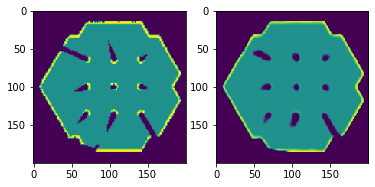

Epoch [45/50], Step [5/75], Loss: 0.024018
Epoch [45/50], Step [10/75], Loss: 0.023738
Epoch [45/50], Step [15/75], Loss: 0.024142
Epoch [45/50], Step [20/75], Loss: 0.023056
Epoch [45/50], Step [25/75], Loss: 0.024278
Epoch [45/50], Step [30/75], Loss: 0.023609
Epoch [45/50], Step [35/75], Loss: 0.023551
Epoch [45/50], Step [40/75], Loss: 0.024049
Epoch [45/50], Step [45/75], Loss: 0.023041
Epoch [45/50], Step [50/75], Loss: 0.022334
Epoch [45/50], Step [55/75], Loss: 0.023406
Epoch [45/50], Step [60/75], Loss: 0.023638
Epoch [45/50], Step [65/75], Loss: 0.023458
Epoch [45/50], Step [70/75], Loss: 0.022567
Epoch [45/50], Step [75/75], Loss: 0.021324
Epoch [45/50], Average Train Loss: 0.023194, Average Test Loss: 0.023505


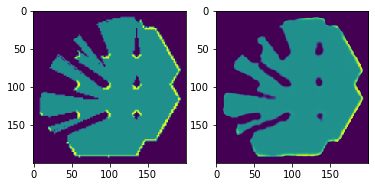

Epoch [46/50], Step [5/75], Loss: 0.022936
Epoch [46/50], Step [10/75], Loss: 0.023039
Epoch [46/50], Step [15/75], Loss: 0.023295
Epoch [46/50], Step [20/75], Loss: 0.021919
Epoch [46/50], Step [25/75], Loss: 0.023048
Epoch [46/50], Step [30/75], Loss: 0.023843
Epoch [46/50], Step [35/75], Loss: 0.022064
Epoch [46/50], Step [40/75], Loss: 0.023104
Epoch [46/50], Step [45/75], Loss: 0.023817
Epoch [46/50], Step [50/75], Loss: 0.023523
Epoch [46/50], Step [55/75], Loss: 0.023469
Epoch [46/50], Step [60/75], Loss: 0.023765
Epoch [46/50], Step [65/75], Loss: 0.022722
Epoch [46/50], Step [70/75], Loss: 0.023338
Epoch [46/50], Step [75/75], Loss: 0.023740
Epoch [46/50], Average Train Loss: 0.023124, Average Test Loss: 0.023555


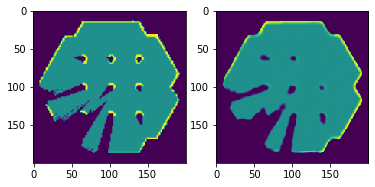

Epoch [47/50], Step [5/75], Loss: 0.022899
Epoch [47/50], Step [10/75], Loss: 0.023589
Epoch [47/50], Step [15/75], Loss: 0.023862
Epoch [47/50], Step [20/75], Loss: 0.023141
Epoch [47/50], Step [25/75], Loss: 0.022253
Epoch [47/50], Step [30/75], Loss: 0.022501
Epoch [47/50], Step [35/75], Loss: 0.022117
Epoch [47/50], Step [40/75], Loss: 0.023927
Epoch [47/50], Step [45/75], Loss: 0.021922
Epoch [47/50], Step [50/75], Loss: 0.023143
Epoch [47/50], Step [55/75], Loss: 0.023450
Epoch [47/50], Step [60/75], Loss: 0.022982
Epoch [47/50], Step [65/75], Loss: 0.022087
Epoch [47/50], Step [70/75], Loss: 0.024048
Epoch [47/50], Step [75/75], Loss: 0.021847
Epoch [47/50], Average Train Loss: 0.023179, Average Test Loss: 0.024327


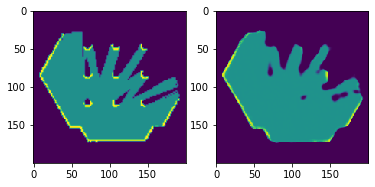

Epoch [48/50], Step [5/75], Loss: 0.023449
Epoch [48/50], Step [10/75], Loss: 0.022539
Epoch [48/50], Step [15/75], Loss: 0.022899
Epoch [48/50], Step [20/75], Loss: 0.022366
Epoch [48/50], Step [25/75], Loss: 0.022478
Epoch [48/50], Step [30/75], Loss: 0.022199
Epoch [48/50], Step [35/75], Loss: 0.022757
Epoch [48/50], Step [40/75], Loss: 0.022557
Epoch [48/50], Step [45/75], Loss: 0.022362
Epoch [48/50], Step [50/75], Loss: 0.022187
Epoch [48/50], Step [55/75], Loss: 0.023279
Epoch [48/50], Step [60/75], Loss: 0.021811
Epoch [48/50], Step [65/75], Loss: 0.023225
Epoch [48/50], Step [70/75], Loss: 0.022967
Epoch [48/50], Step [75/75], Loss: 0.024198
Epoch [48/50], Average Train Loss: 0.022945, Average Test Loss: 0.023162


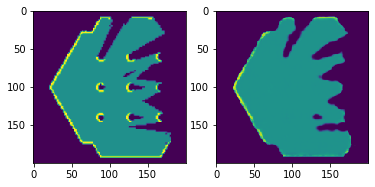

Epoch [49/50], Step [5/75], Loss: 0.023800
Epoch [49/50], Step [10/75], Loss: 0.023466
Epoch [49/50], Step [15/75], Loss: 0.023545
Epoch [49/50], Step [20/75], Loss: 0.022529
Epoch [49/50], Step [25/75], Loss: 0.021462
Epoch [49/50], Step [30/75], Loss: 0.022187
Epoch [49/50], Step [35/75], Loss: 0.021988
Epoch [49/50], Step [40/75], Loss: 0.021664
Epoch [49/50], Step [45/75], Loss: 0.021571
Epoch [49/50], Step [50/75], Loss: 0.023337
Epoch [49/50], Step [55/75], Loss: 0.022265
Epoch [49/50], Step [60/75], Loss: 0.022825
Epoch [49/50], Step [65/75], Loss: 0.023332
Epoch [49/50], Step [70/75], Loss: 0.022197
Epoch [49/50], Step [75/75], Loss: 0.023812
Epoch [49/50], Average Train Loss: 0.022728, Average Test Loss: 0.022804


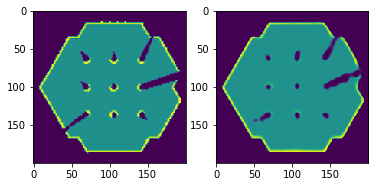

Epoch [50/50], Step [5/75], Loss: 0.022190
Epoch [50/50], Step [10/75], Loss: 0.022310
Epoch [50/50], Step [15/75], Loss: 0.022745
Epoch [50/50], Step [20/75], Loss: 0.022394
Epoch [50/50], Step [25/75], Loss: 0.022324
Epoch [50/50], Step [30/75], Loss: 0.022421
Epoch [50/50], Step [35/75], Loss: 0.023076
Epoch [50/50], Step [40/75], Loss: 0.022952
Epoch [50/50], Step [45/75], Loss: 0.021603
Epoch [50/50], Step [50/75], Loss: 0.022357
Epoch [50/50], Step [55/75], Loss: 0.023487
Epoch [50/50], Step [60/75], Loss: 0.022125
Epoch [50/50], Step [65/75], Loss: 0.023182
Epoch [50/50], Step [70/75], Loss: 0.022330
Epoch [50/50], Step [75/75], Loss: 0.019925
Epoch [50/50], Average Train Loss: 0.022546, Average Test Loss: 0.022886


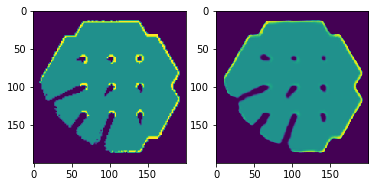

In [8]:
num_epochs = 50

for epoch in range(num_epochs):
    train_total_loss = 0.
    test_total_loss = 0.
    for i, [img] in enumerate(train_data_loader):
        outputs = autoencoder(img)
        loss = cirterion(outputs, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_total_loss += loss.item()
        if (i + 1) % 5 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_data_loader)}], Loss: {loss.item():.6f}")
    with torch.no_grad():
        for [img] in test_data_loader:
          outputs = autoencoder(img)
          loss = cirterion(outputs, img)
          test_total_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}]"
            f", Average Train Loss: {train_total_loss / len(train_data_loader):.6f}"
            f", Average Test Loss: {test_total_loss / len(test_data_loader):.6f}")
    
    plot_result(autoencoder, test_data)

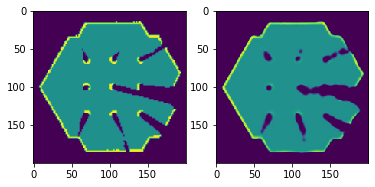

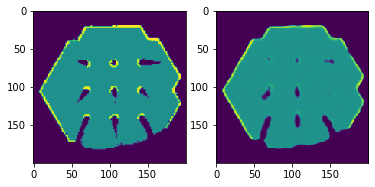

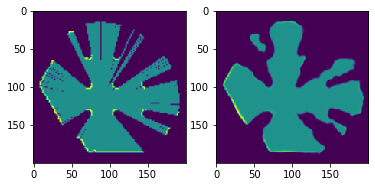

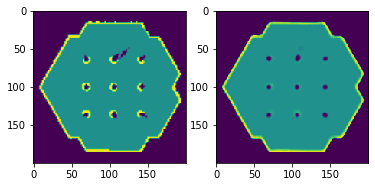

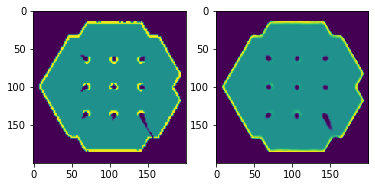

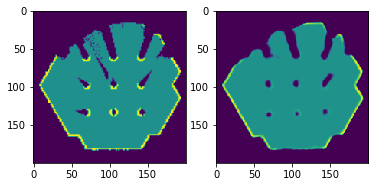

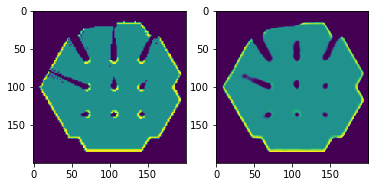

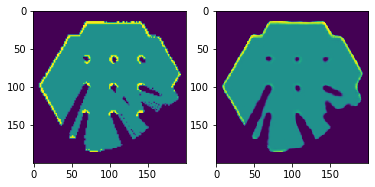

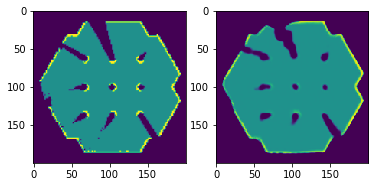

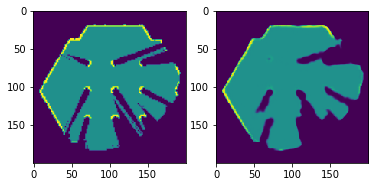

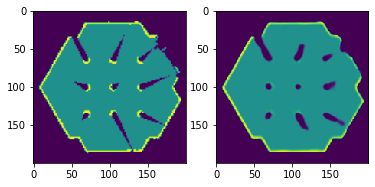

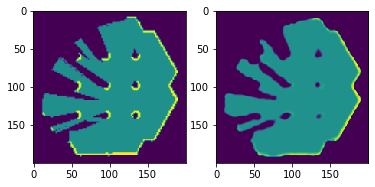

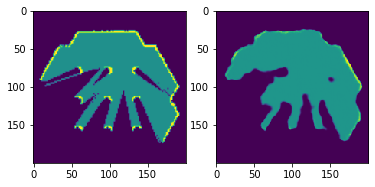

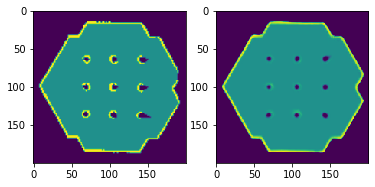

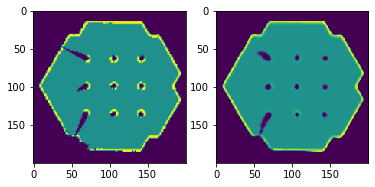

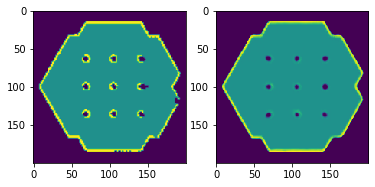

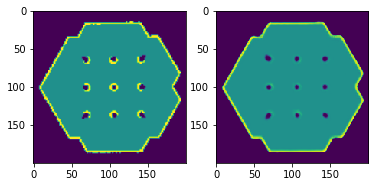

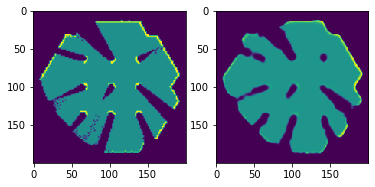

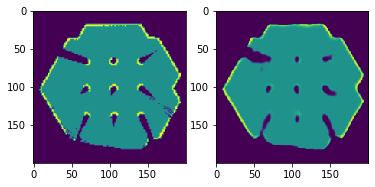

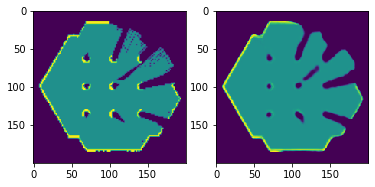

In [9]:
for _ in range(20):
    plot_result(autoencoder, test_data)

In [10]:
# TODO move const
weight_dir = "/home/asad/catkin_ws2/src/turtlebot3_activeSLAM/dqn_controller/weights/"


In [11]:
torch.save(autoencoder.state_dict(), weight_dir + "map_autoencoder_weight " + str(datetime.datetime.now())[:19])

In [12]:
weight_path = weight_dir + sorted([w for w in os.listdir(weight_dir) if "map_autoencoder" in w])[-1]

In [13]:
model = mapAutoencoder.Autoencoder()
model.load_state_dict(torch.load(weight_path))
model = model.to(device)

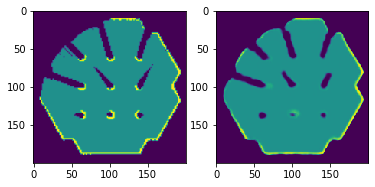

In [14]:
plot_result(model, test_data)